In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read Data

In [2]:
data_path = r'Data/COALINDIA TRAIN.csv'
data = pd.read_csv(data_path, index_col='Date', parse_dates=True, dayfirst=True)

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,315.500000,318.000000,314.549988,317.299988,129.144241,2929118.0
2011-01-04,318.899994,320.000000,316.049988,319.200012,129.917557,2716995.0
2011-01-05,320.000000,320.000000,308.250000,309.799988,126.091690,8555905.0
2011-01-06,311.000000,313.000000,308.500000,309.100006,125.806793,2763146.0
2011-01-07,310.000000,313.500000,302.149994,309.100006,125.806793,2298583.0
...,...,...,...,...,...,...
2022-12-26,215.050003,221.600006,214.250000,220.750000,215.474915,3116608.0
2022-12-27,222.000000,222.899994,219.649994,221.250000,215.962967,2961726.0
2022-12-28,221.250000,224.250000,220.550003,223.199997,217.866364,3015714.0


# Checking null values

In [4]:
data.isna().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

## Dropping null values

In [5]:
data.dropna(inplace=True)

In [6]:
data = data['Close']  

# Check if data is stationary or not using ADF TEST
ADF stands for Augmented Dickey-Fuller test, which is a statistical test used to check for the presence of a unit root in a time series data. The presence of a unit root indicates that the time series is non-stationary, meaning it has a trend and its statistical properties, such as the mean and variance, change over time.

The null hypothesis of the ADF test is that the time series has a unit root, i.e., it is non-stationary. The alternative hypothesis is that the time series is stationary.

The ADF test calculates a test statistic, and based on the value of this test statistic and the critical values from the ADF distribution, it determines whether to reject the null hypothesis (non-stationary) in favor of the alternative hypothesis (stationary). If the test statistic is less negative than the critical values, we fail to reject the null hypothesis and conclude that the time series has a unit root and is non-stationary. If the test statistic is more negative than the critical values, we reject the null hypothesis and conclude that the time series is stationary.

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print(f"ADF Statistics {result[0]}")
print(f"p-value: {result[1]}")      

ADF Statistics -1.7875297436350757
p-value: 0.38667016863899245


# Estimating d value

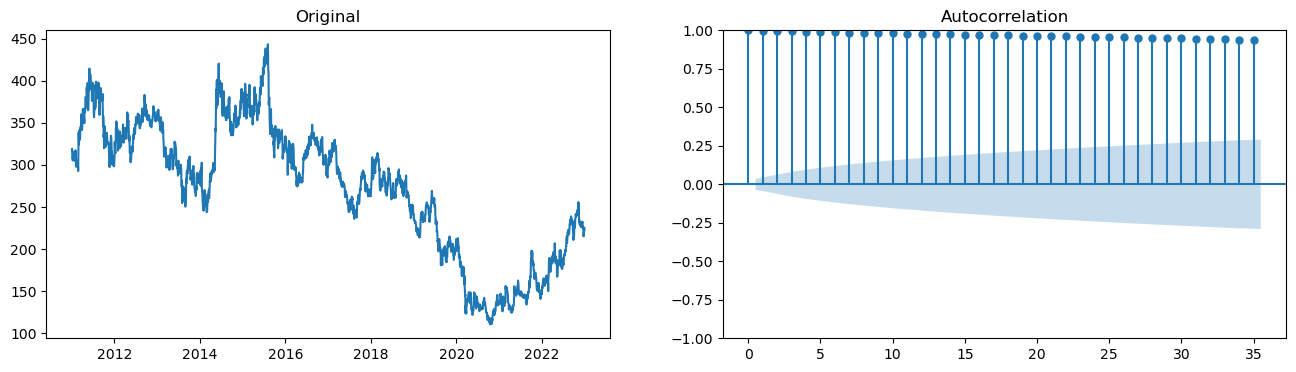

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(data)
ax1.set_title("Original")
plot_acf(data,ax=ax2);

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


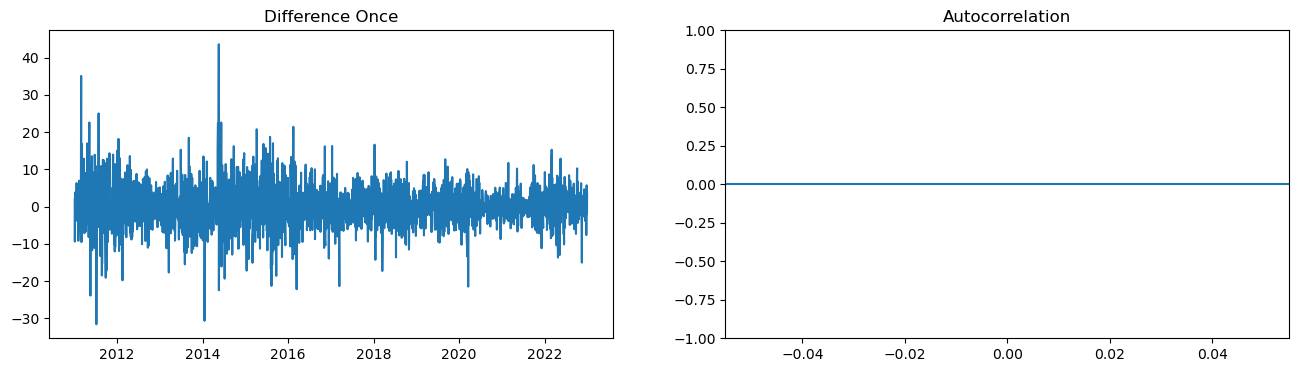

In [9]:
diff = data.diff()
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

# Estimating p and q values

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


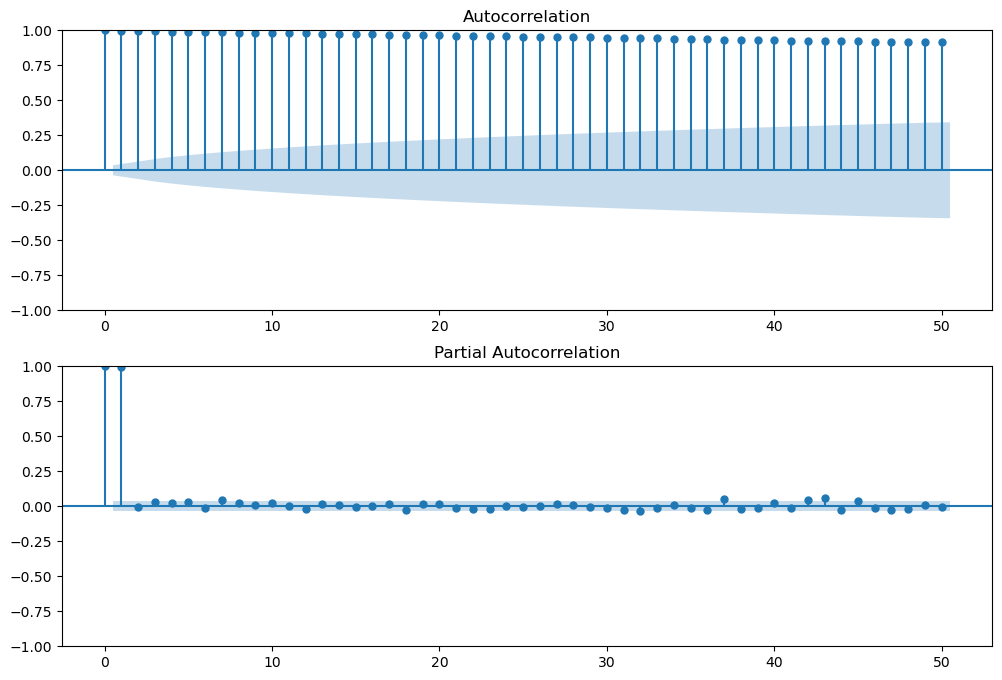

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data, ax=ax1, lags=50)
plot_pacf(data, ax=ax2, lags=50)
plt.show()

# Model Training

In [11]:
order = (38, 2, 1)
model = ARIMA(data, order=order)
results = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2959
Model:                ARIMA(38, 2, 1)   Log Likelihood               -9147.486
Date:                Wed, 19 Jul 2023   AIC                          18374.973
Time:                        11:15:10   BIC                          18614.650
Sample:                             0   HQIC                         18461.247
                               - 2959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0425      0.035     -1.205      0.228      -0.112       0.027
ar.L2         -0.0470      0.035     -1.358      0.175      -0.115       0.021
ar.L3         -0.0611      0.035     -1.756      0.0

# Forecasting Values

In [13]:
n_forecast = 62
forecast = results.forecast(steps=n_forecast)

# Print the forecasted values
print("Forecasted values:")
print(forecast)


Forecasted values:
2959    224.380815
2960    224.618347
2961    225.818427
2962    225.656689
2963    225.890659
           ...    
3016    212.947559
3017    212.625554
3018    212.449279
3019    212.341514
3020    212.305924
Name: predicted_mean, Length: 62, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\Users\Deependra\AppData\Local\Temp\ipykernel_13616\3636566972.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data.index[-1], periods=n_forecast + 1, closed='right')


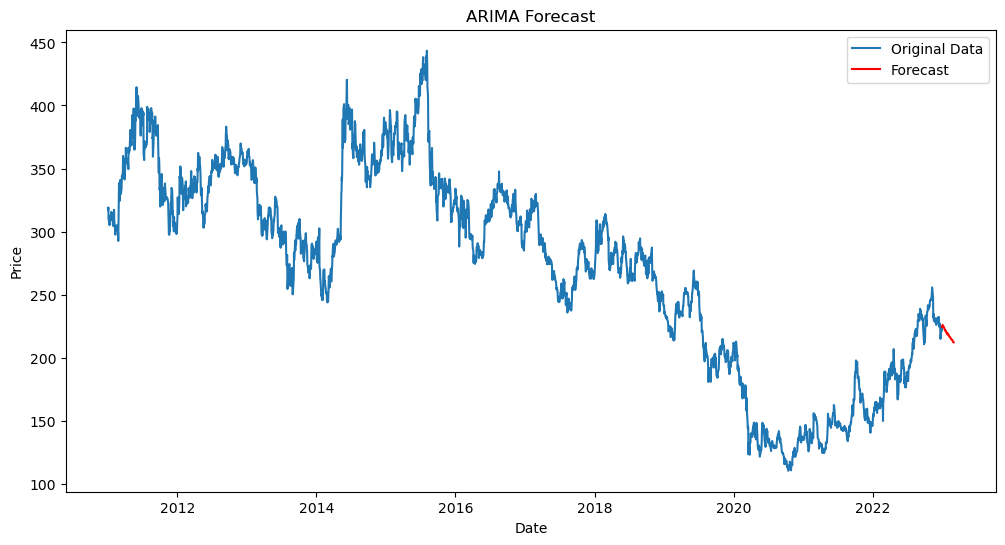

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
forecast_dates = pd.date_range(start=data.index[-1], periods=n_forecast + 1, closed='right')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Model Testing

In [15]:
test_data_path = "Data/COALINDIA TEST.csv"  
test_data = pd.read_csv(test_data_path, index_col='Date', parse_dates=True, dayfirst=True)

In [16]:
test_data.isna().sum()

Open         186
High         186
Low          186
Close        186
Adj Close    186
Volume       186
dtype: int64

In [17]:
test_data.dropna(inplace=True)

In [18]:
test_close_data = test_data['Close']

C:\Users\Deependra\AppData\Local\Temp\ipykernel_13616\2671787592.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data.index[-1], periods=n_forecast + 1, closed='right')


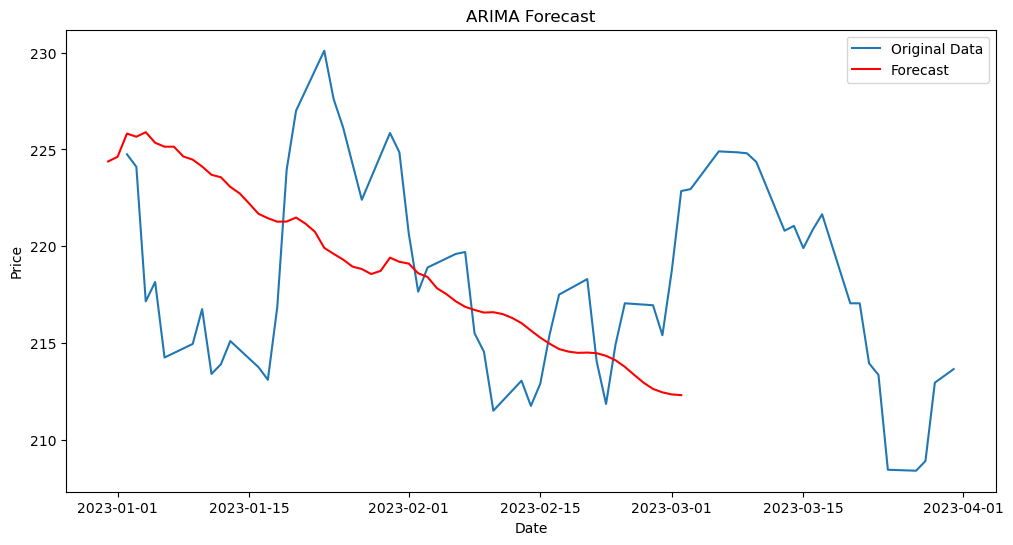

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(test_close_data, label='Original Data')
forecast_dates = pd.date_range(start=data.index[-1], periods=n_forecast + 1, closed='right')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Error Metrics

In [20]:
mae = mean_absolute_error(test_close_data, forecast)
mse = mean_squared_error(test_close_data, forecast)
rmse = mean_squared_error(test_close_data, forecast, squared=False)
r2 = r2_score(test_close_data, forecast)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 4.856887441238677
Mean Squared Error: 35.709124919231456
Root Mean Squared Error: 5.97571124797973
R-squared (R2) Score: -0.37417940885974477
